
 Comparison of Manifold Learning methods

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.



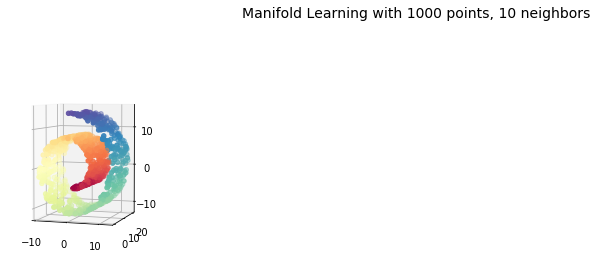

In [21]:
"""
=========================================
 Comparison of Manifold Learning methods
=========================================

An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.

For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`

For a similar example, where the methods are applied to a
sphere dataset, see :ref:`sphx_glr_auto_examples_manifold_plot_manifold_sphere.py`

Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.
"""

# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

plt.show() 


/home/maxim/Projects/scikit-learn/sklearn/manifold/forests.py:27: RuntimeWarning: invalid value encountered in log
  entropy = np.log(det)
/home/maxim/.virtualenvs/ml/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/maxim/.virtualenvs/ml/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[[ 1.    0.01  0.14 ...,  0.    0.09  0.11]
 [ 0.01  1.    0.07 ...,  0.05  0.    0.34]
 [ 0.14  0.07  1.   ...,  0.08  0.    0.33]
 ..., 
 [ 0.    0.05  0.08 ...,  1.    0.38  0.07]
 [ 0.09  0.    0.   ...,  0.38  1.    0.01]
 [ 0.11  0.34  0.33 ...,  0.07  0.01  1.  ]]
Manifold forests & t-SNE: 5.7e+02 sec


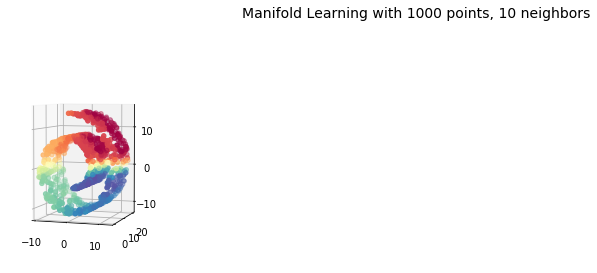

In [34]:
plt.figure()
t0 = time()
mf = manifold.ManifoldForest(num_trees=100, depth=4, num_options=10, num_features=3)
W = mf.fit_transform(X)
print(W)
tsne = manifold.SpectralEmbedding(n_components=1, affinity='precomputed', random_state=0)
Y = tsne.fit_transform(W)
t1 = time()
print("Manifold forests & t-SNE: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

plt.show() 